In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from kalman_filter_without_control import *

In [328]:
def get_real_position(t):
    return (t**2 + 10*t + 100)*t**2/1e7

In [14]:
def get_real_velocity(t):
    return (get_real_position(t + 1e-4) - get_real_position(t - 1e-4))/2e-4

In [15]:
def get_real_acceleration(t):
    return (get_real_velocity(t + 1e-4) - get_real_velocity(t - 1e-4))/2e-4

In [16]:
def obsevation(t, cov):
    return get_real_position(t) + np.random.randn(*t.shape)*np.sqrt(cov)

In [334]:
delta_t = 1/T
initial_estimate = np.array([[get_real_position(200)], [get_real_velocity(200)], [get_real_acceleration(200)]])
initial_error_cov = np.array([
    [10**2, 0, 0],
    [0, 5**2, 0],
    [0, 0, 1**2]
])
observation_noise_cov = np.array([[100**2]])
process_noise = np.array([
    [10**2, 0, 0],
    [0, 5**2, 0],
    [0, 0, 1**2]
])
transition_matrix = np.array([
        [1, delta_t, 0.5*delta_t**2],
        [0, 1, delta_t],
        [0, 0, 1]
])
observation_matrix = np.array(
        [[1, 0, 0]]
)

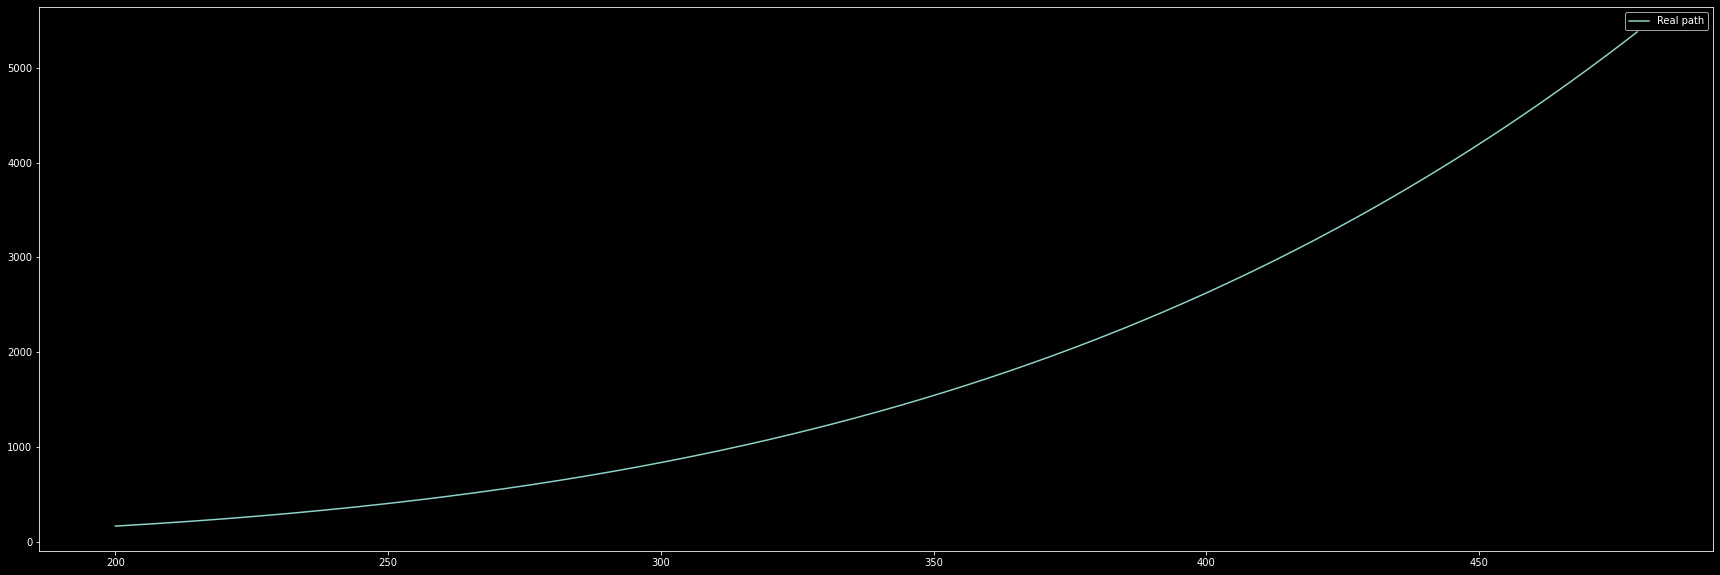

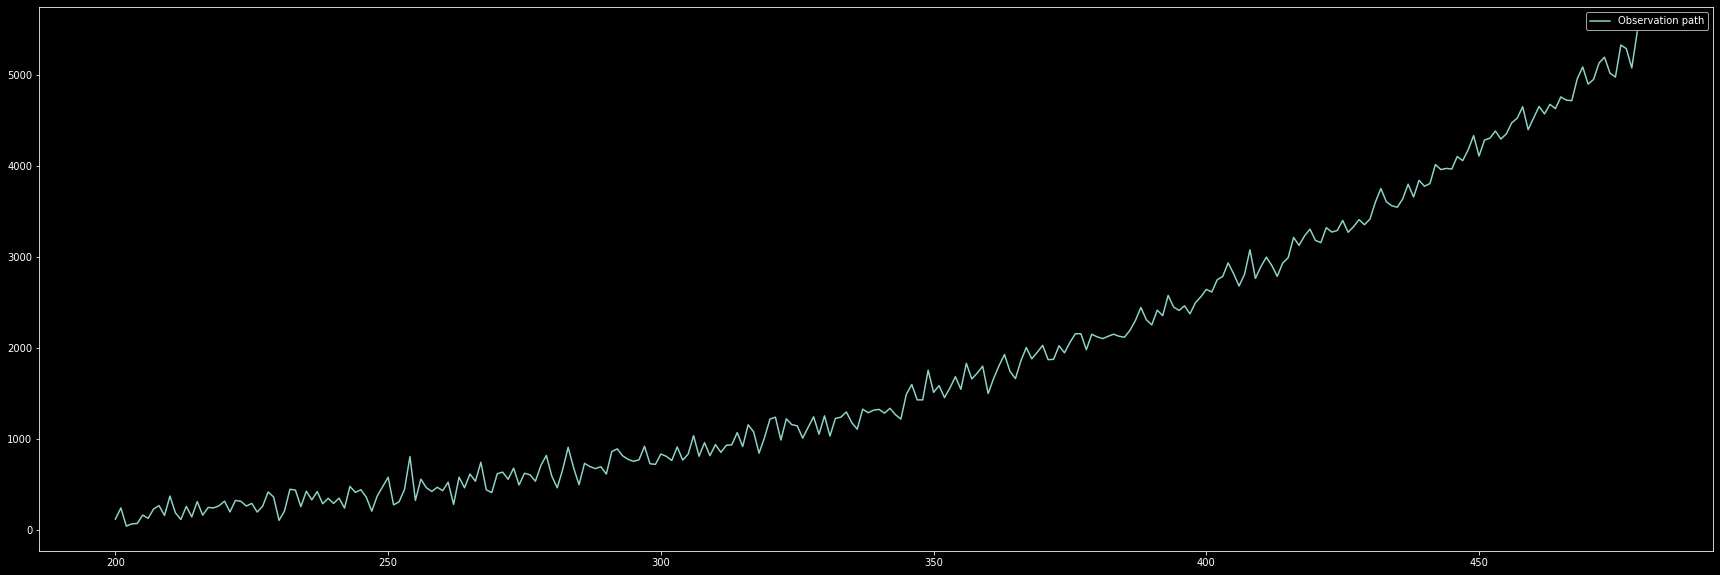

In [335]:
L = 8
T = 1
t = np.arange(200, 60*L,step=1/T)
plt.figure(figsize=(30,10))
plt.plot(t, get_real_position(t), label="Real path")
plt.legend()
plt.show()
plt.figure(figsize=(30,10))
plt.plot(t, obsevation(t, observation_noise_cov[0,0]), label="Observation path")
plt.legend()
plt.show()

In [341]:
kalman_state = []
estimate_position = []
real_position = []
position_observation_list = []
position_estimate_var_list = []
position_prior_var_list = []

velocity_estimate_var_list = []
velocity_prior_var_list = []

accelerator_estimate_var_list = []
accelerator_prior_var_list = []

estimate_velocity = []
real_velocity = []

estimate_acc = []
real_acc = []

pre_estimate = initial_estimate
pre_cov = initial_error_cov
initial_observation = obsevation(
    np.array([[1]]), 
    observation_noise_cov
)
observation_t = initial_observation

position_observation_list.append(observation_t[0][0])
position_estimate_var_list.append(pre_cov[0][0])
position_prior_var_list.append(pre_cov[0][0])

velocity_estimate_var_list.append(pre_cov[1][1])
velocity_prior_var_list.append(pre_cov[1][1])

accelerator_estimate_var_list.append(pre_cov[2][2])
accelerator_prior_var_list.append(pre_cov[2][2])

In [342]:
for i in t:
    kalman_value = kalman_predict(
        pre_estimate,
        observation_t,
        pre_cov,
        transition_matrix,
        observation_matrix,
        process_noise,
        observation_noise_cov
    )
    kalman_state.append(kalman_value)
    pre_estimate = kalman_value["estimate"]
    pre_cov = kalman_value["cov"]
    observation_t = obsevation(
        np.array([[i+1]]), 
        observation_noise_cov
    )
    position_observation_list.append(observation_t[0][0])
    position_estimate_var_list.append(pre_cov[0][0])
    position_prior_var_list.append(kalman_value["prior_cov"][0][0])

    velocity_estimate_var_list.append(pre_cov[1][1])
    velocity_prior_var_list.append(kalman_value["prior_cov"][1][1])

    accelerator_estimate_var_list.append(pre_cov[2][2])
    accelerator_prior_var_list.append(kalman_value["prior_cov"][2][0])
    

    estimate_velocity.append(pre_estimate[1][0])
    real_velocity.append(get_real_velocity(i))

    estimate_acc.append(pre_estimate[2][0])
    real_acc.append(get_real_acceleration(i))



estimate_position = [kalman_v["estimate"][0][0] for kalman_v in kalman_state]
real_position = [get_real_position(step) for step in t]


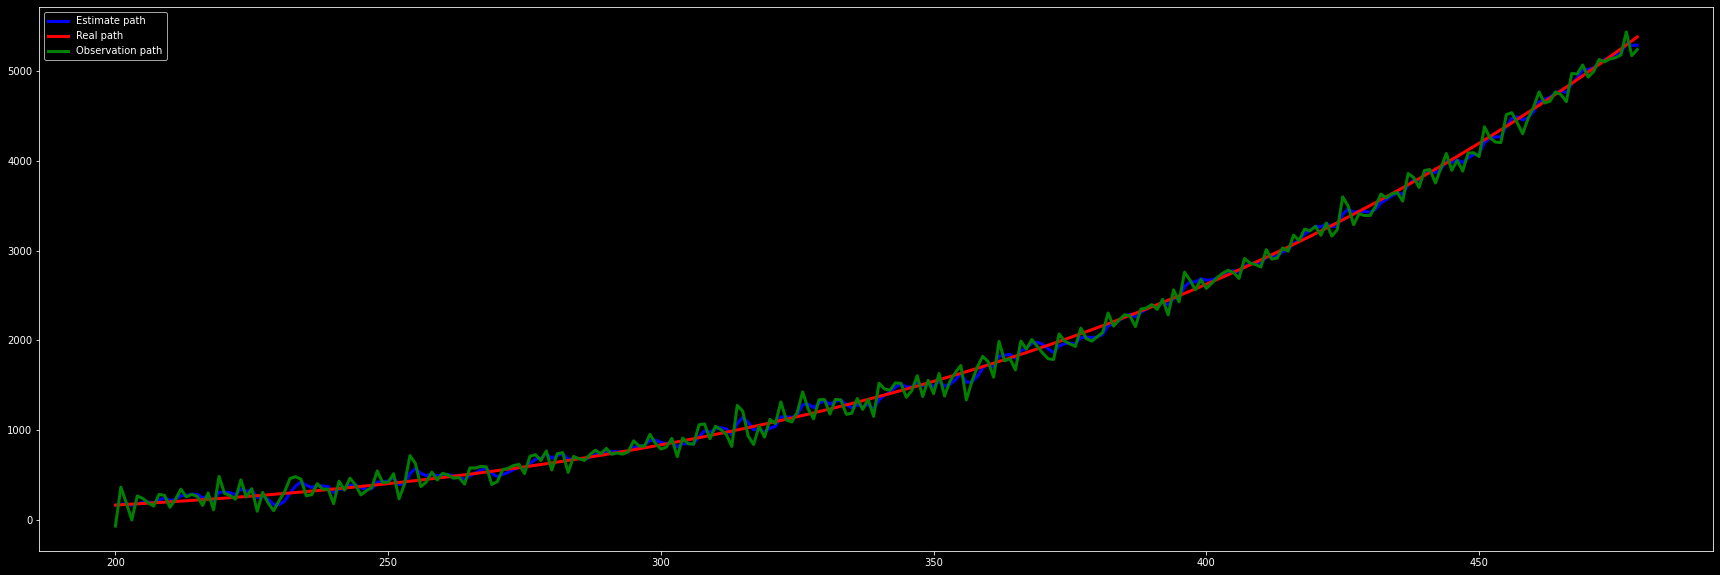

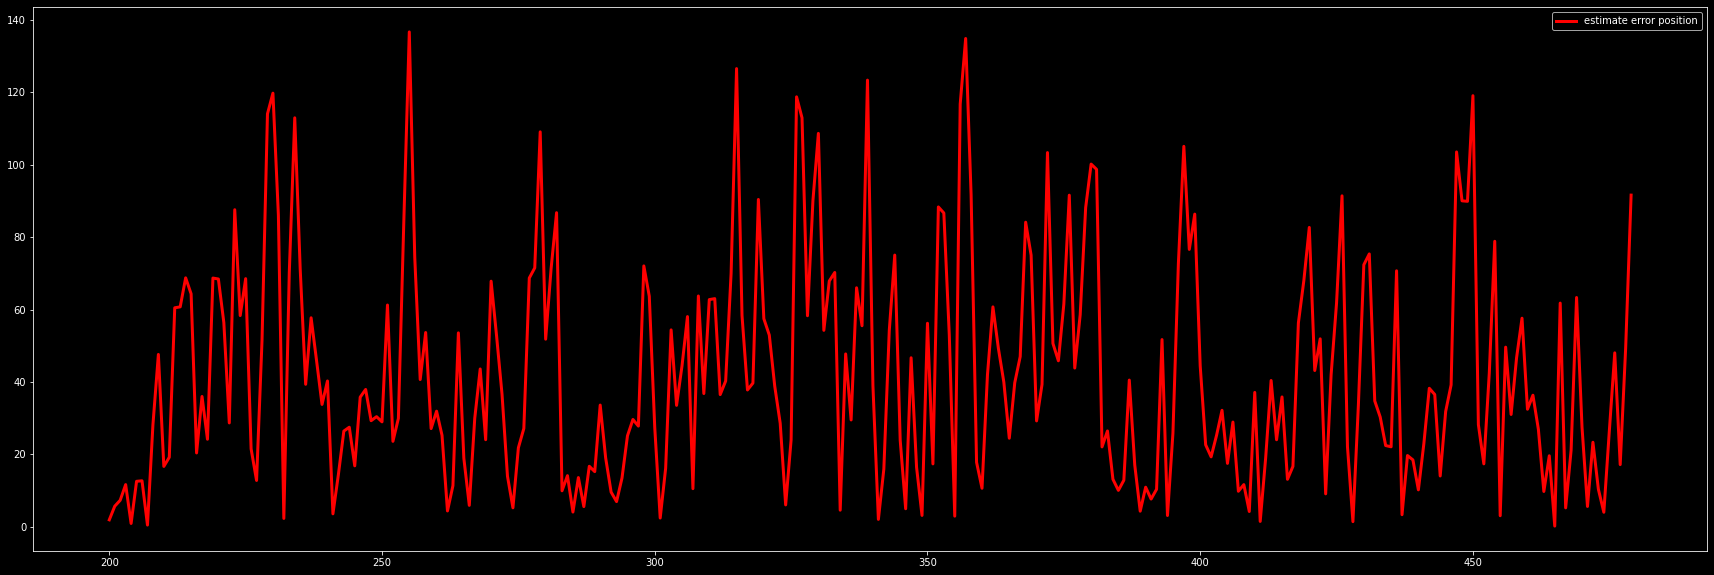

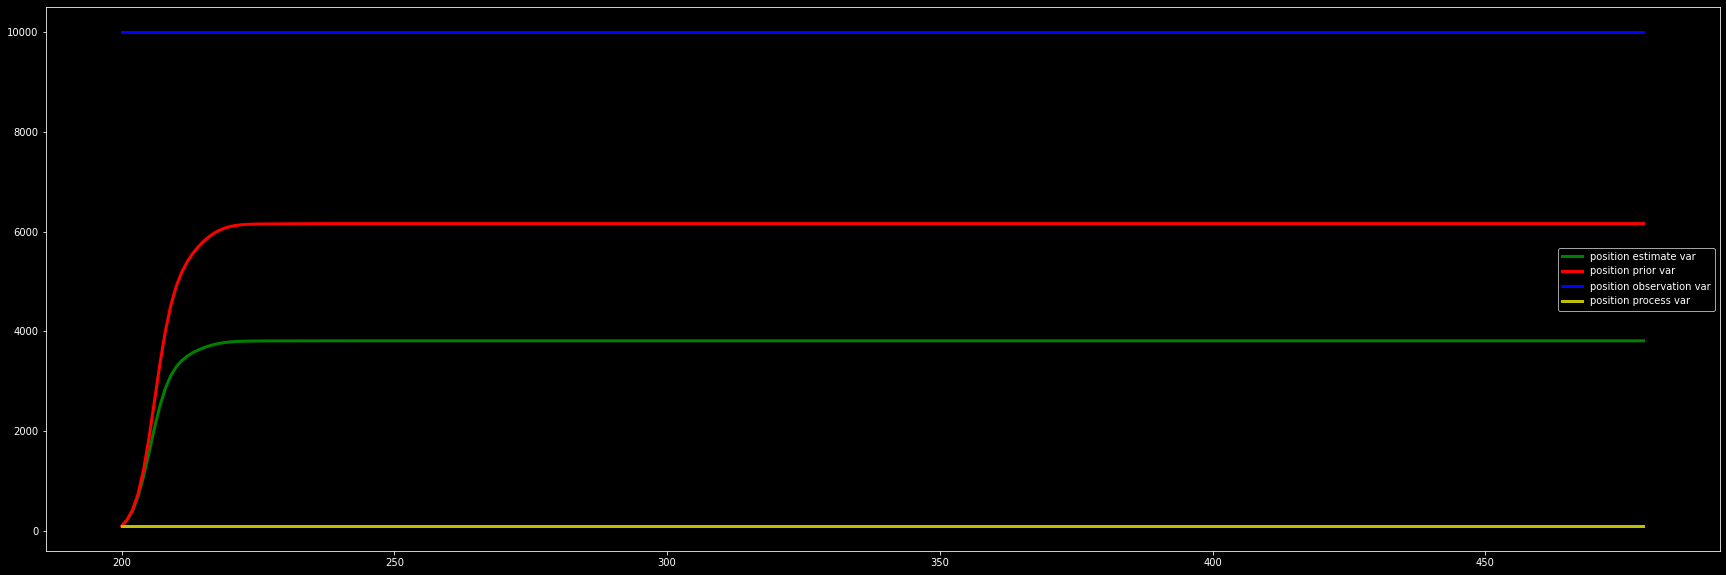

In [345]:
plt.rcParams['figure.facecolor'] = 'black'

plt.figure(figsize=(30,10))
plt.plot(t, estimate_position, 'b', label="Estimate path", linewidth=3)
plt.plot(t, get_real_position(t), 'r', label="Real path", linewidth=3)
plt.legend()
plt.plot(t, position_observation_list[0:-1], 'g', label="Observation path", linewidth=3)
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
plt.plot(t, [np.abs(a - b) for a, b in zip(estimate_position, get_real_position(t))], 'r', label="estimate error position", linewidth=3)
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
plt.plot(t, position_estimate_var_list[0:-1], 'g', label="position estimate var", linewidth=3)
plt.legend()
plt.plot(t, position_prior_var_list[0:-1], 'r', label="position prior var", linewidth=3)
plt.legend()
plt.plot(t, [observation_noise_cov[0][0]]*len(t), 'b', label="position observation var", linewidth=3)
plt.legend()
plt.plot(t, [process_noise[0][0]]*len(t), 'y', label="position process var", linewidth=3)
plt.legend()
plt.show()

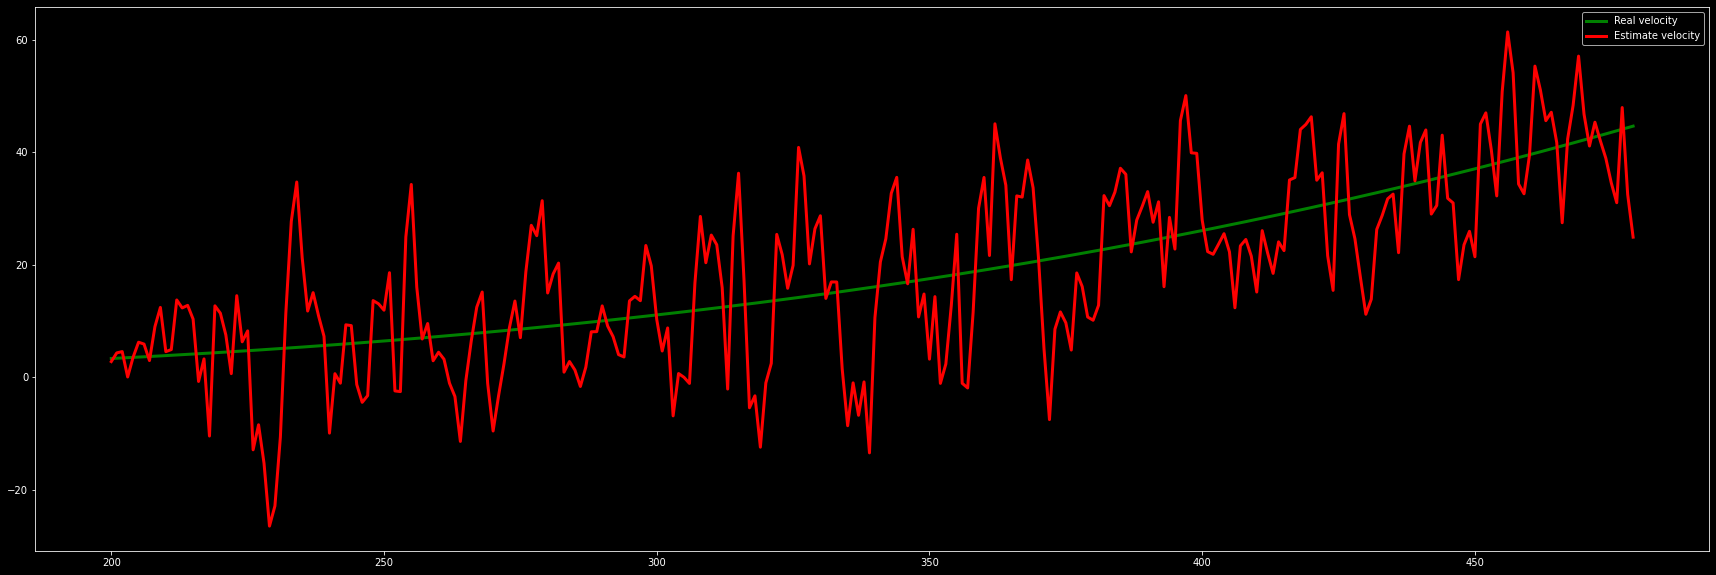

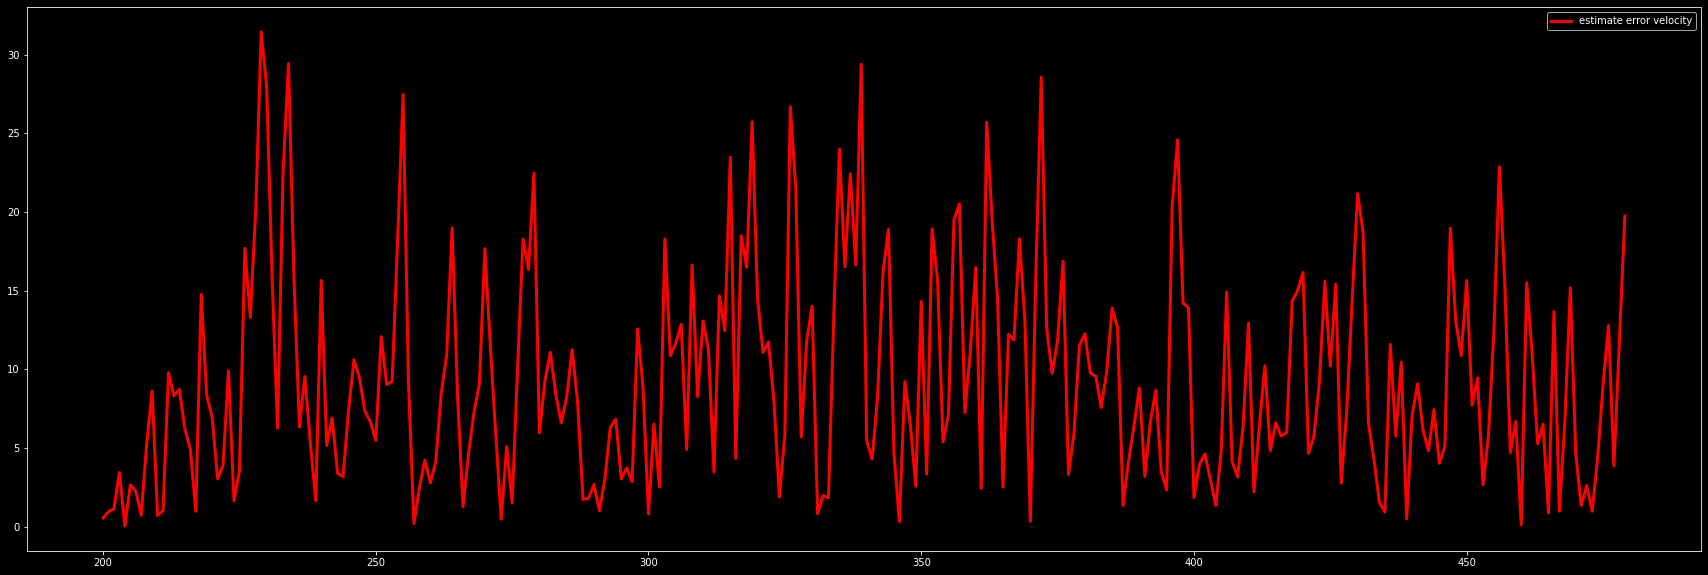

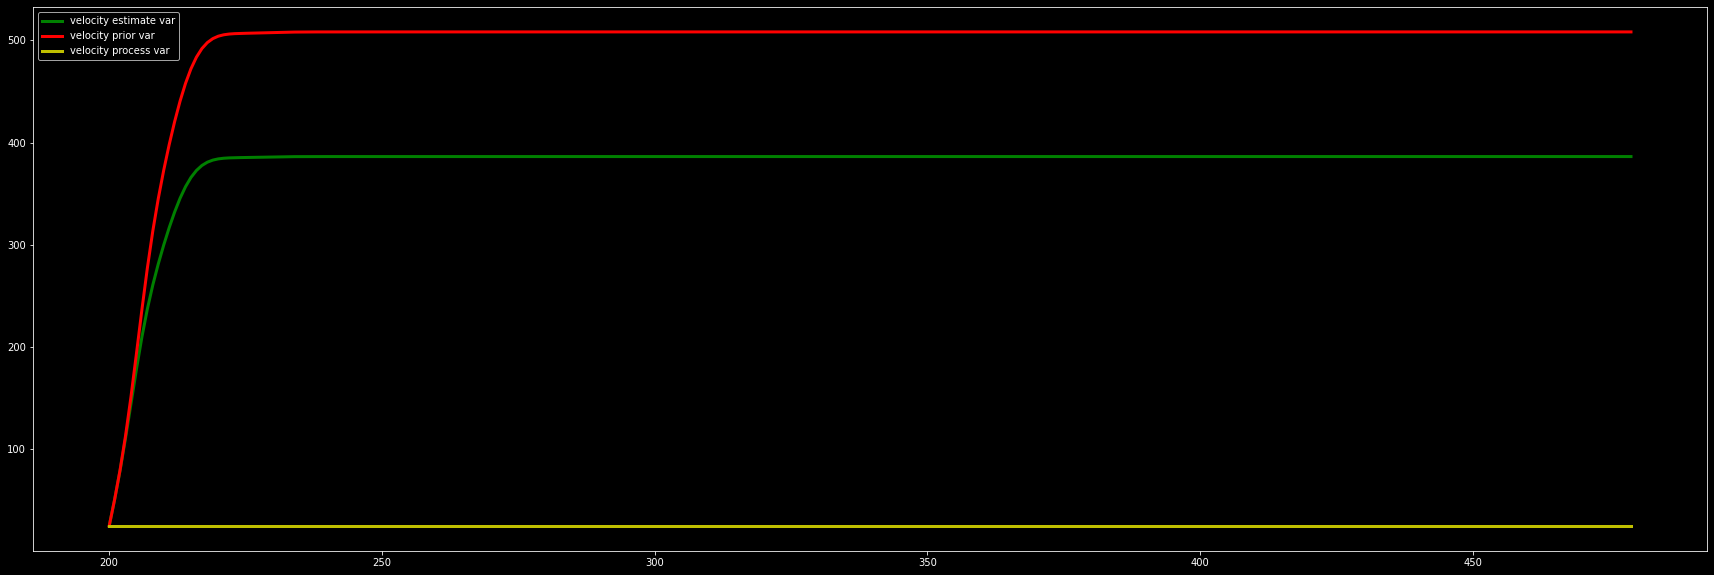

In [346]:
plt.figure(figsize=(30,10))
plt.plot(t, real_velocity, 'g', label="Real velocity", linewidth=3)
plt.legend()
plt.plot(t, estimate_velocity, 'r', label="Estimate velocity", linewidth=3)
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
plt.plot(t, [np.abs(a - b) for a, b in zip(real_velocity, estimate_velocity)], 'r', label="estimate error velocity", linewidth=3)
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
plt.plot(t, velocity_estimate_var_list[0:-1], 'g', label="velocity estimate var", linewidth=3)
plt.legend()
plt.plot(t, velocity_prior_var_list[0:-1], 'r', label="velocity prior var", linewidth=3)
plt.legend()
plt.plot(t, [process_noise[1][1]]*len(t), 'y', label="velocity process var", linewidth=3)
plt.legend()
plt.show()



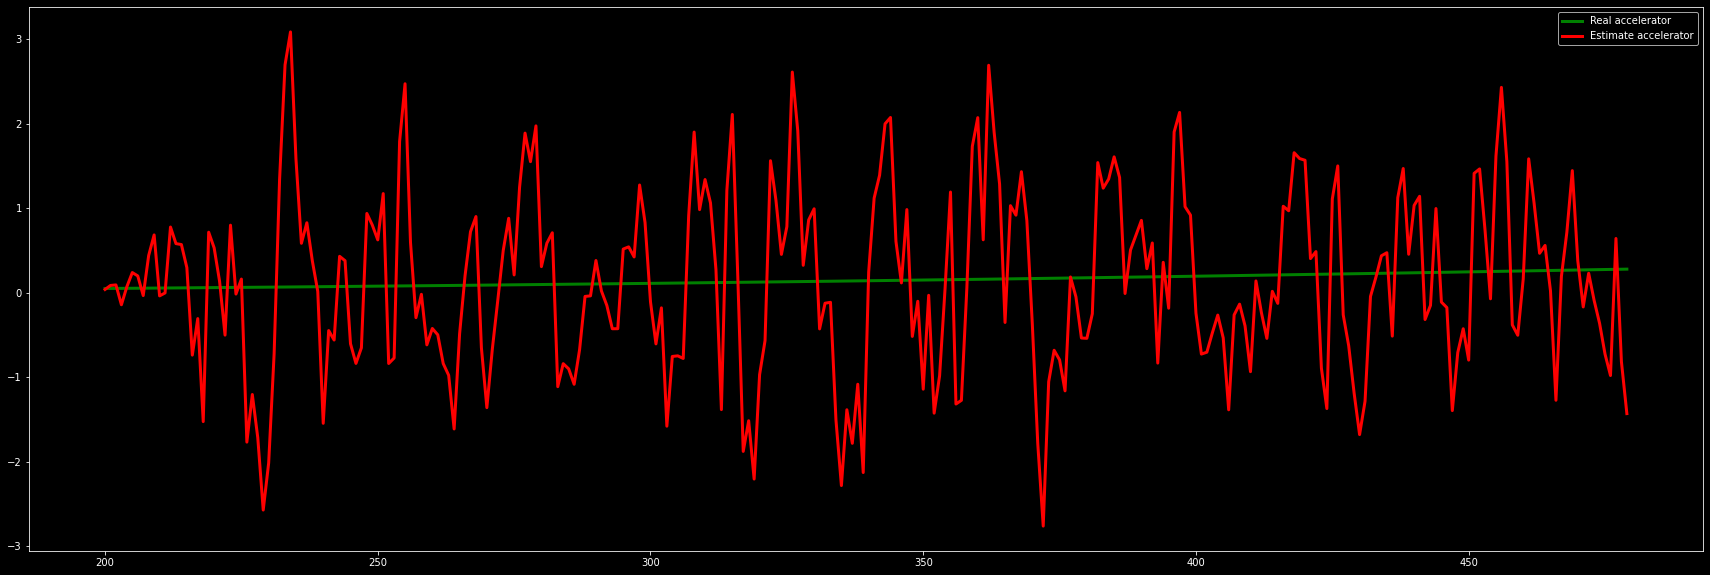

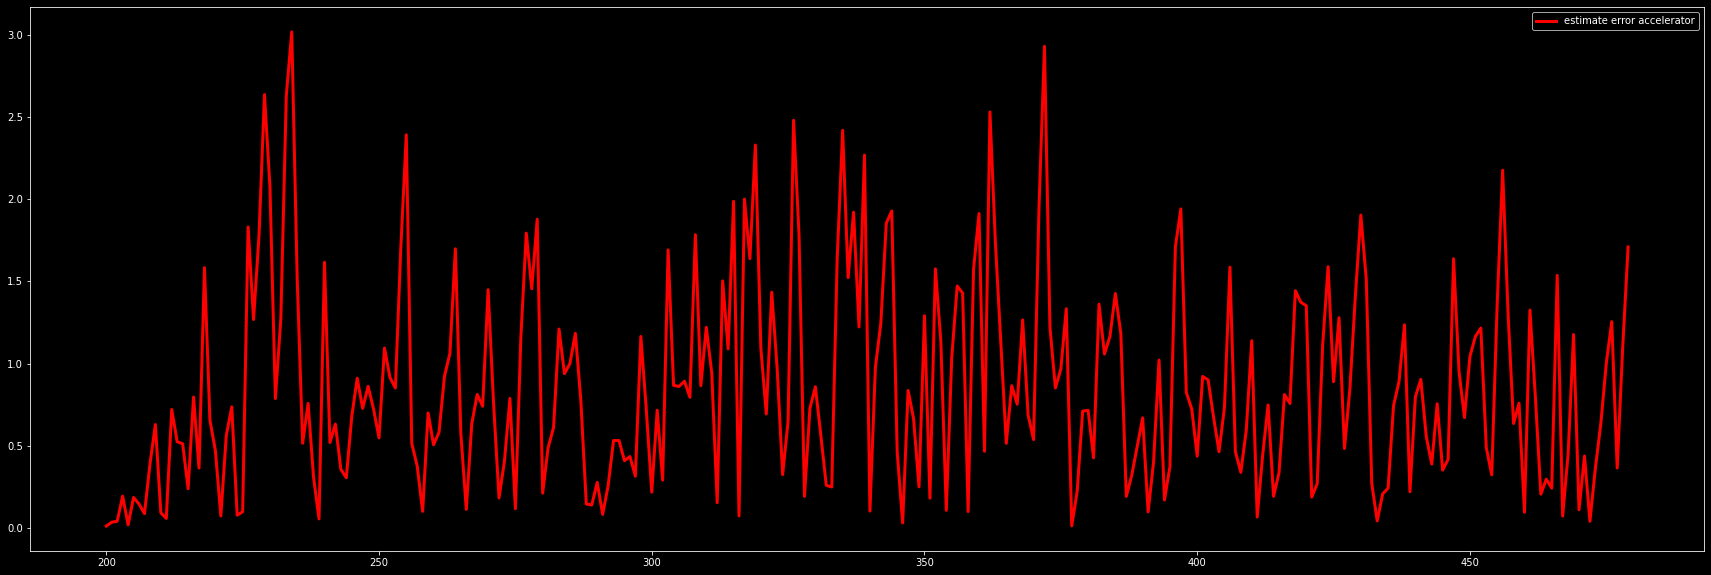

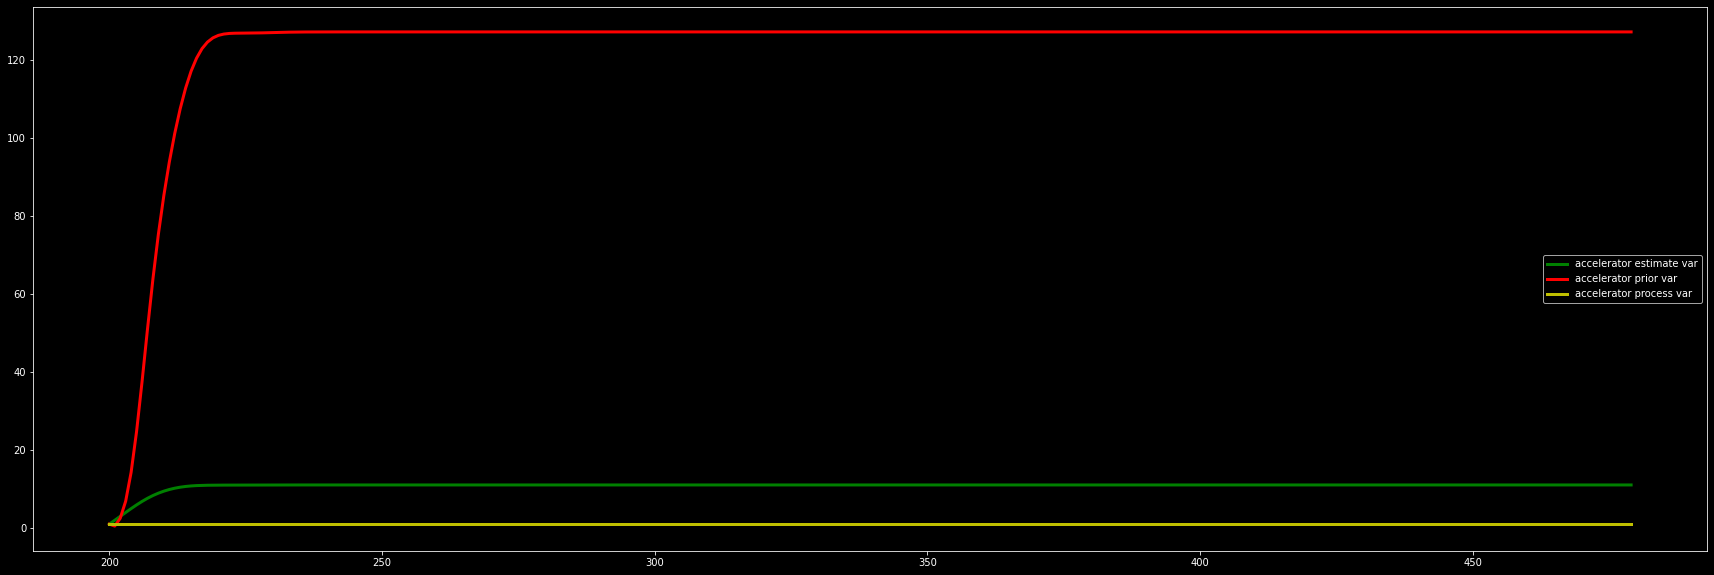

In [347]:
plt.figure(figsize=(30,10))
plt.plot(t, real_acc, 'g', label="Real accelerator", linewidth=3)
plt.legend()
plt.plot(t, estimate_acc, 'r', label="Estimate accelerator", linewidth=3)
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
plt.plot(t, [np.abs(a - b) for a, b in zip(real_acc, estimate_acc)], 'r', label="estimate error accelerator", linewidth=3)
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
plt.plot(t, accelerator_estimate_var_list[0:-1], 'g', label="accelerator estimate var", linewidth=3)
plt.legend()
plt.plot(t, accelerator_prior_var_list[0:-1], 'r', label="accelerator prior var", linewidth=3)
plt.legend()
plt.plot(t, [process_noise[2][2]]*len(t), 'y', label="accelerator process var", linewidth=3)
plt.legend()
plt.show()